In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [25]:
# Import the API key.
from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=664a1f38424f0b056080ef1b2a40e9ff


In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | lapeer
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | tooele
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | wattegama
Processing Record 12 of Set 1 | saint-louis
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | livramento
Processing Record 16 of Set 1 | kharitonovo
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | garowe
Processing Rec

Processing Record 40 of Set 4 | mackay
Processing Record 41 of Set 4 | valparaiso
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | taos
Processing Record 44 of Set 4 | osakarovka
Processing Record 45 of Set 4 | nuevo progreso
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | codroipo
Processing Record 48 of Set 4 | hollola
Processing Record 49 of Set 4 | agadir
Processing Record 50 of Set 4 | kompaniyivka
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | puerto leguizamo
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | yarada
Processing Record 5 of Set 5 | omsukchan
Processing Record 6 of Set 5 | vestmannaeyjar
Processing Record 7 of Set 5 | howard springs
Processing Record 8 of Set 5 | gazli
Processing Record 9 of Set 5 | qaanaaq
Processing Record 10 of Set 5 | vanavara
Processing Record 11 of Set 5 | nemuro
Processing Record 12 of Set 5 | toowoomba
Processing Record 13 of

Processing Record 25 of Set 8 | miri
Processing Record 26 of Set 8 | clarence town
Processing Record 27 of Set 8 | turayf
Processing Record 28 of Set 8 | nsanje
Processing Record 29 of Set 8 | phan rang
City not found. Skipping...
Processing Record 30 of Set 8 | xuddur
Processing Record 31 of Set 8 | tshikapa
Processing Record 32 of Set 8 | palmer
Processing Record 33 of Set 8 | georgetown
Processing Record 34 of Set 8 | gerash
Processing Record 35 of Set 8 | itaituba
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | tautira
Processing Record 38 of Set 8 | prince rupert
Processing Record 39 of Set 8 | torbat-e jam
Processing Record 40 of Set 8 | mega
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | batagay-alyta
Processin

Processing Record 15 of Set 12 | mudyuga
City not found. Skipping...
Processing Record 16 of Set 12 | mayo
Processing Record 17 of Set 12 | santa rita
Processing Record 18 of Set 12 | ilulissat
Processing Record 19 of Set 12 | dunabogdany
Processing Record 20 of Set 12 | rabak
Processing Record 21 of Set 12 | moerai
Processing Record 22 of Set 12 | inirida
Processing Record 23 of Set 12 | sangar
Processing Record 24 of Set 12 | gao
Processing Record 25 of Set 12 | port augusta
Processing Record 26 of Set 12 | gorontalo
Processing Record 27 of Set 12 | shupiyan
Processing Record 28 of Set 12 | domna
Processing Record 29 of Set 12 | bilma
Processing Record 30 of Set 12 | batagay
Processing Record 31 of Set 12 | kuah
Processing Record 32 of Set 12 | hovd
Processing Record 33 of Set 12 | srandakan
Processing Record 34 of Set 12 | rungata
City not found. Skipping...
Processing Record 35 of Set 12 | karaul
City not found. Skipping...
Processing Record 36 of Set 12 | moroni
Processing Record 

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-03-06 05:20:40,14.8961,-24.4956,70.23,74,49,11.43
1,Lapeer,US,2021-03-06 05:20:41,43.0514,-83.3188,30.20,64,1,11.50
2,Punta Arenas,CL,2021-03-06 05:20:41,-53.1500,-70.9167,53.60,82,90,5.75
3,Atuona,PF,2021-03-06 05:20:41,-9.8000,-139.0333,79.47,75,69,14.32
4,Mataura,NZ,2021-03-06 05:20:42,-46.1927,168.8643,62.01,57,82,4.00
5,Guerrero Negro,MX,2021-03-06 05:20:42,27.9769,-114.0611,60.67,73,95,15.05
6,Tooele,US,2021-03-06 05:20:42,40.5308,-112.2983,45.00,56,1,6.91
7,Hobart,AU,2021-03-06 05:20:43,-42.8794,147.3294,63.00,55,0,17.27
8,Faanui,PF,2021-03-06 05:20:43,-16.4833,-151.7500,82.58,67,86,3.15
9,Wattegama,LK,2021-03-06 05:16:34,6.7989,81.4808,87.80,70,20,6.91


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1615008687.682694

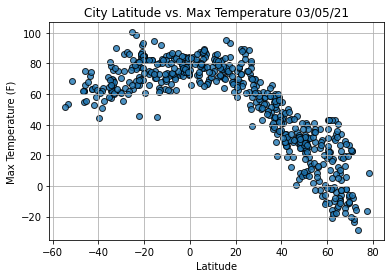

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

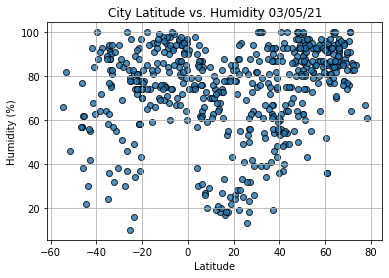

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

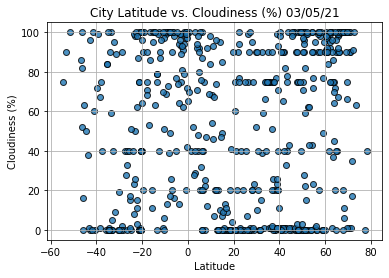

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

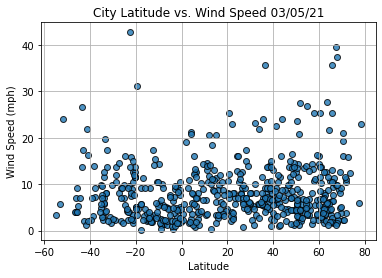

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()